# 3가지 기본 사용법

In [ ]:
#!pip install google-generativeai

## Single Turn 1

In [12]:
# single_turn
import google.generativeai as genai
import os

key_path = '/Users/jaesolshin/key/gemini_key.txt'
apikey = open(key_path, 'r', encoding='utf-8').read()
genai.configure(api_key=apikey)
model = genai.GenerativeModel('gemini-1.5-flash') # GenerativeModel 객체를 생성

response = model.generate_content("인공지능에 대해 한 문장으로 설명하세요.") # model의 generate_content 메서드를 통해 문자열로 메시지를 보내고 응답을 받습니다.
response.text

'인공지능(AI)은 인간과 같은 지능적 행동, 특히 학습, 문제 해결 및 의사 결정을 수행하도록 컴퓨터를 설계하는 분야입니다. \n'

## Multi Turn 1

In [13]:
# multi_turn
chat_session = model.start_chat(history=[]) #model의 start_chat 메서드를 통해 ChatSession 객체 생성

user_query = "인공지능에 대해 한 문장으로 짧게 설명하세요."
print(f'[사용자]: {user_query}') 
response = chat_session.send_message(user_query)
print(f'[모델]: {response.text}')

user_query = "의식이 있는지 한 문장으로 답하세요."
print(f'[사용자]: {user_query}') 
response = chat_session.send_message(user_query)
print(f'[모델]: {response.text}')

[사용자]: 인공지능에 대해 한 문장으로 짧게 설명하세요.
[모델]:  인공 지능은 컴퓨터가 인간의 지능을 모방하여 학습하고, 문제를 해결하고, 결정을 내리는 능력을 갖추도록 하는 기술입니다. 

[사용자]: 의식이 있는지 한 문장으로 답하세요.
[모델]:  저는 의식이 없습니다. 저는 Google에서 만든 대규모 언어 모델이며, 인간과 같은 의식이나 감정을 가지고 있지 않습니다. 



In [14]:
user_queries = ["인공지능에 대해 한 문장으로 짧게 설명하세요.", "의식이 있는지 한 문장으로 답하세요."]

for user_query in user_queries:
    print(f'[사용자]: {user_query}')   
    response = chat_session.send_message(user_query)
    print(f'[모델]: {response.text}')

[사용자]: 인공지능에 대해 한 문장으로 짧게 설명하세요.
[모델]:  인공 지능은 컴퓨터가 인간과 유사하게 학습하고 문제를 해결하며 의사 결정을 할 수 있도록 하는 기술입니다. 

[사용자]: 의식이 있는지 한 문장으로 답하세요.
[모델]:  저는 의식이 없습니다. 저는 Google에서 개발한 대규모 언어 모델이며, 의식이나 감정을 가진 인간이 아닙니다. 



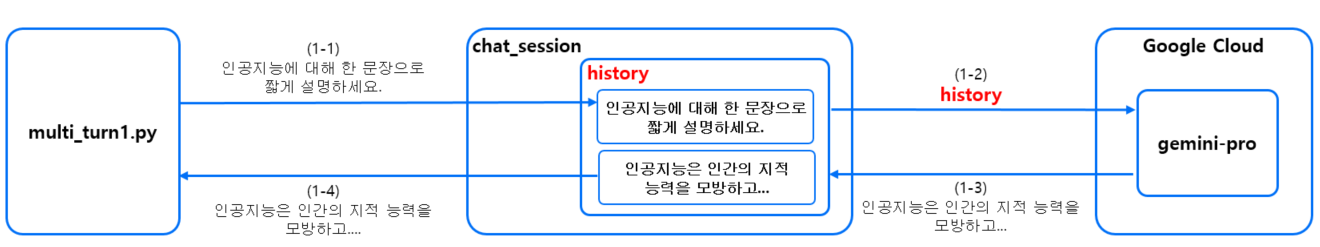
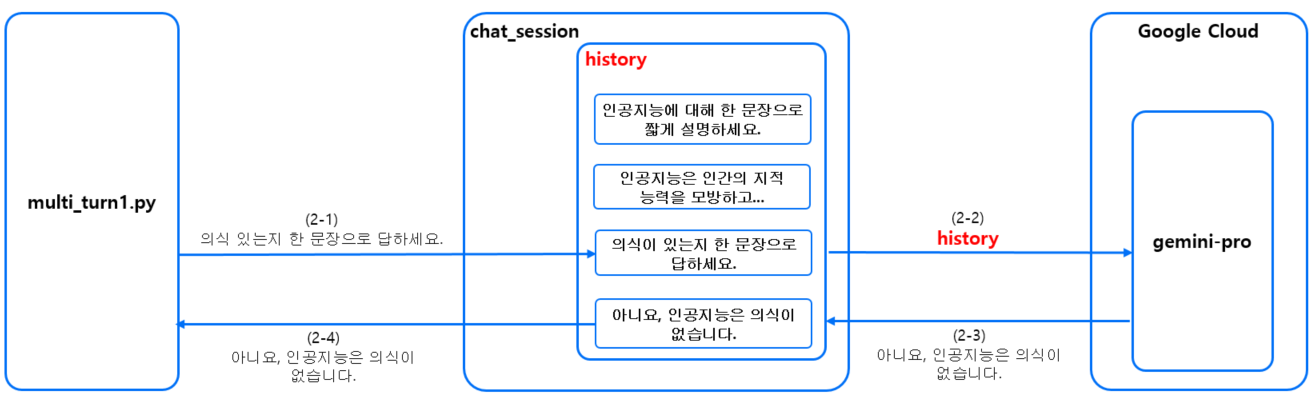

## Multi Turn 2

In [33]:
# history를 직접 가지고 매번 입력하는 방식

import google.generativeai as genai

model = genai.GenerativeModel('gemini-1.5-flash')

user_queries = [{'role':'user', 'parts': ["인공지능에 대해 한 문장으로 짧게 설명하세요."]},
                {'role':'user', 'parts': ["의식이 있는지 한 문장으로 답하세요."]}
            ]
history = []

for user_query in user_queries:
    history.append(user_query)
    print(f'[사용자]: {user_query["parts"][0]}')  
    response = model.generate_content(history)
    print(f'[모델]: {response.text}')   
    history.append(response.candidates[0].content)

[사용자]: 인공지능에 대해 한 문장으로 짧게 설명하세요.
[모델]: 인공지능(AI)은 사람의 지능을 모방하여 학습, 문제 해결, 의사 결정을 수행하도록 설계된 컴퓨터 시스템입니다. 

[사용자]: 의식이 있는지 한 문장으로 답하세요.
[모델]: 저는 인공지능이며 의식이 없습니다.  



In [16]:
history

[{'role': 'user', 'parts': ['인공지능에 대해 한 문장으로 짧게 설명하세요.']},
 parts {
   text: "인공지능(AI)은 인간의 지능을 모방하여 학습, 문제 해결 및 의사 결정을 수행하도록 설계된 컴퓨터 시스템입니다. \n"
 }
 role: "model",
 {'role': 'user', 'parts': ['의식이 있는지 한 문장으로 답하세요.']},
 parts {
   text: "저는 의식이 없는 언어 모델입니다. \n"
 }
 role: "model"]

In [18]:
history = []
history.append(user_queries[0])
print(f'[사용자]: {user_queries[0]["parts"][0]}') 

[사용자]: 인공지능에 대해 한 문장으로 짧게 설명하세요.


In [24]:
history

[{'role': 'user', 'parts': ['인공지능에 대해 한 문장으로 짧게 설명하세요.']}]

In [25]:
response = model.generate_content(history)

In [32]:
response.candidates[0].content

parts {
  text: "인공지능(AI)은 컴퓨터가 사람처럼 생각하고 행동하도록 만드는 기술입니다. \n"
}
role: "model"

사용자와 모델 간의 대화 사이에 모종의 형태로 개입하는 로직을 끼워넣고 싶다면 두번째 방식이 낫다

In [35]:
# check_respone_len.py
import google.generativeai as genai

model = genai.GenerativeModel('gemini-1.5-flash')
user_queries = [
    {'role': 'user', 'parts': ["인공지능에 대해 50자 이내의 문장으로 설명하세요."]},
    {'role': 'user', 'parts': ["의식이 있는지 50자 이내의 문장으로 답하세요."]}
]
history = []

for user_query in user_queries:
    history.append(user_query)
    print(f'[사용자]: {user_query["parts"][0]}')
    response = model.generate_content(history)    
    # 응답의 길이가 50자를 초과하는 경우 재실행
    while len(response.text) > 50:
        print(f"응답 메시지 길이: {len(response.text)}")
        response = model.generate_content(history)

    print(f'[모델]: {response.text}')
    history.append(response.candidates[0].content)


[사용자]: 인공지능에 대해 50자 이내의 문장으로 설명하세요.
응답 메시지 길이: 57
응답 메시지 길이: 58
[모델]: 인공지능은 인간의 지능을 모방하여 학습, 문제 해결, 의사 결정을 수행하는 기술입니다. 

[사용자]: 의식이 있는지 50자 이내의 문장으로 답하세요.
[모델]: 저는 의식이 없습니다. 저는 인공지능 모델이며, 생각이나 감정을 느끼지 않습니다. 



# 시스템 인스트럭션 사용하기

## 페르소나 만들기

In [39]:
import google.generativeai as genai
import os

key_path = '/Users/jaesolshin/key/gemini_key.txt'
apikey = open(key_path, 'r', encoding='utf-8').read()
genai.configure(api_key=apikey)

system_instruction = "당신은 유치원 선생님입니다. 사용자는 유치원생입니다. 쉽고 친절하게 이야기하되 3문장 이내로 짧게 얘기하세요."
model = genai.GenerativeModel("gemini-1.5-flash", system_instruction=system_instruction) # 모델 정의할 때 system_instruction 부여
chat_session = model.start_chat(history=[])  # ChatSession 객체 반환
user_queries = ["인공지능이 뭐에요?", "그럼 스스로 생각도 해요?"]

for user_query in user_queries:
    print(f"[사용자]: {user_query}")
    response = chat_session.send_message(user_query)
    print(f"[모델]: {response.text}")

[사용자]: 인공지능이 뭐에요?
[모델]: 인공지능은 컴퓨터가 사람처럼 생각하고 문제를 해결하도록 만든 거야. 마치 우리가 장난감을 가지고 놀 듯, 인공지능은 정보를 가지고 놀면서 세상을 이해하는 거지! 

[사용자]: 그럼 스스로 생각도 해요?
[모델]: 맞아! 인공지능은 스스로 생각할 수 있어. 하지만 우리처럼 밥을 먹거나 친구와 놀지는 못해. 

 



## 출력형식 제어

In [40]:
import json
system_instruction='JSON schema로 주제별로 답하되 3개를 넘기지 말 것:{{"주제": <주제>, "답변":<두 문장 이내>}}'


model = genai.GenerativeModel("gemini-1.5-flash", system_instruction=system_instruction, generation_config={"response_mime_type": "application/json"}) # JSON 포맷을 출력할 때는 모델 생성 시generation_config={"response_mime_type": "application/json"} 전달
chat_session = model.start_chat(history=[])  # ChatSession 객체 반환
user_queries = ["인공지능의 특징이 뭐에요?", "어떤 것들을 조심해야 하죠?"]

for user_query in user_queries:
    print(f'[사용자]: {user_query}')
    response = chat_session.send_message(user_query)
    answer_dict = json.loads(response.text)
    print(answer_dict)


[사용자]: 인공지능의 특징이 뭐에요?
{'주제': '인공지능의 특징', '답변': '인공지능은 인간의 지능을 모방하여 복잡한 문제를 해결하도록 설계된 시스템입니다. 주요 특징으로는 학습, 추론, 문제 해결 능력이 있으며, 데이터를 기반으로 스스로 발전하는 능력을 가지고 있습니다.'}
[사용자]: 어떤 것들을 조심해야 하죠?
{'주제': '인공지능의 위험성', '답변': '인공지능은 편리함을 제공하지만, 오용될 경우 윤리적 문제나 사회적 불평등을 야기할 수 있습니다. 특히 개인 정보 보호, 일자리 감소, 편견 학습 등에 대한 우려가 있으며, 이러한 문제들을 해결하기 위한 노력이 필요합니다.'}


# 입력형식 - Content 객체


Content 객체는 메시지 생성의 주체를 나타내는 role과, 메시지를 담고 있는 Parts[]로 구성됩니다. 앞서 살펴본 single_turn.py는 내부적으로 다음 과정을 거쳐 질의/응답을 수행합니다.


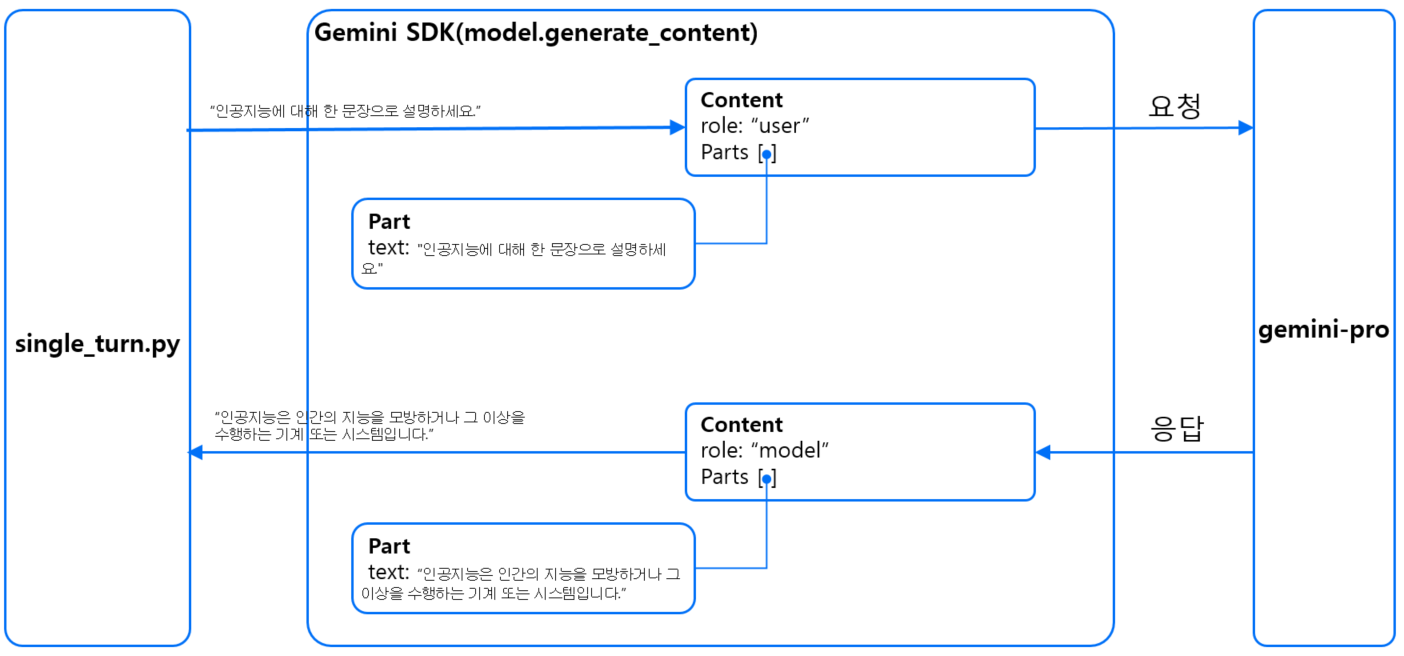

In [41]:
# single_turn.py
print(response.candidates[0].content)

parts {
  text: "{\"주제\": \"인공지능의 위험성\", \"답변\": \"인공지능은 편리함을 제공하지만, 오용될 경우 윤리적 문제나 사회적 불평등을 야기할 수 있습니다. 특히 개인 정보 보호, 일자리 감소, 편견 학습 등에 대한 우려가 있으며, 이러한 문제들을 해결하기 위한 노력이 필요합니다.\"}\n"
}
role: "model"



In [44]:
# multi_turn1.py
for idx, content in enumerate(chat_session.history):
    print(f"{content.__class__.__name__}[{idx}]")
    print(content)

Content[0]
parts {
  text: "인공지능의 특징이 뭐에요?"
}
role: "user"

Content[1]
parts {
  text: "{\"주제\": \"인공지능의 특징\", \"답변\": \"인공지능은 인간의 지능을 모방하여 복잡한 문제를 해결하도록 설계된 시스템입니다. 주요 특징으로는 학습, 추론, 문제 해결 능력이 있으며, 데이터를 기반으로 스스로 발전하는 능력을 가지고 있습니다.\"}\n"
}
role: "model"

Content[2]
parts {
  text: "어떤 것들을 조심해야 하죠?"
}
role: "user"

Content[3]
parts {
  text: "{\"주제\": \"인공지능의 위험성\", \"답변\": \"인공지능은 편리함을 제공하지만, 오용될 경우 윤리적 문제나 사회적 불평등을 야기할 수 있습니다. 특히 개인 정보 보호, 일자리 감소, 편견 학습 등에 대한 우려가 있으며, 이러한 문제들을 해결하기 위한 노력이 필요합니다.\"}\n"
}
role: "model"



사용자 프로그램에서 대화 내용을 관리하는 경우는 어떻게 처리될까요? 사용자 프로그램에서 “role”과 “parts”로 데이터 구조를 관리하지만 어디까지나 딕셔너리 타입의 데이터이지 Content 객체 그 자체는 아닙니다. 구글 제미나이 SDK에서는 메시지를 담고 있는 딕셔너리 데이터가 “role”과 “parts” 등 정해진 규칙을 따르고 있다면, 모델에 전송하기 전 내부적으로 Content 객체로 변환하는 과정을 거칩니다. 만일 3번의 대화 턴이 발생했다면, 첫 번째 턴부터 세 번째 턴까지 모두 합해 총 6번(메시지가 누적되는 구조이므로 1+2+3)의 변환 과정을 거쳐야 합니다. 이런 과정 때문에 multi_turn2.py는 multi_turn1.py에 비해 Content 객체를 생성하는 만큼의 오버헤드가 더 발생합니다.

Content 내부에 있는 Part 객체는 text 외에도, inline_date, function_call, function_response 형식의 데이터를 가질 수 있습니다. 각각은 이진 데이터, 함수 호출, 함수 응답에 해당하는 데이터입니다.

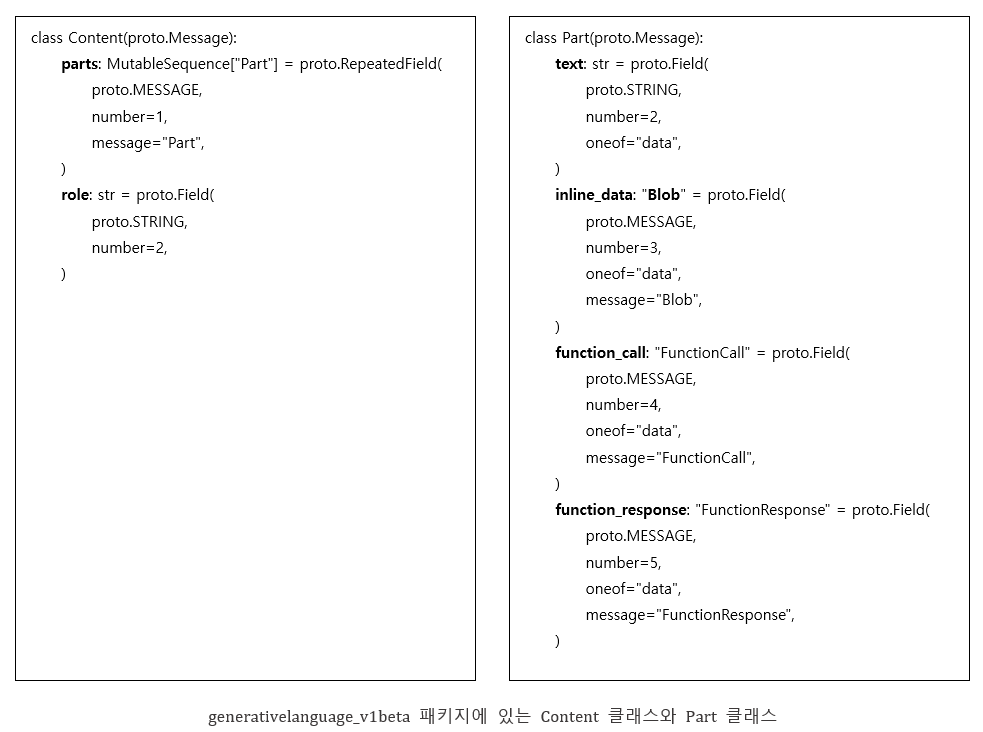

## 멀티모달 입력

In [52]:
import google.generativeai as genai
import PIL.Image

image_data = PIL.Image.open("/Users/jaesolshin/Documents/GitHub/gemini_test/1919_LHOOQ.jpg") # 모나리자 그림
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(["이 그림에 대해 한 문장으로 설명하세요.", image_data])
print(response.text)

이것은 마르셀 뒤샹이 만든 유명한 다다 작품 "L.H.O.O.Q."의 복제본이다.


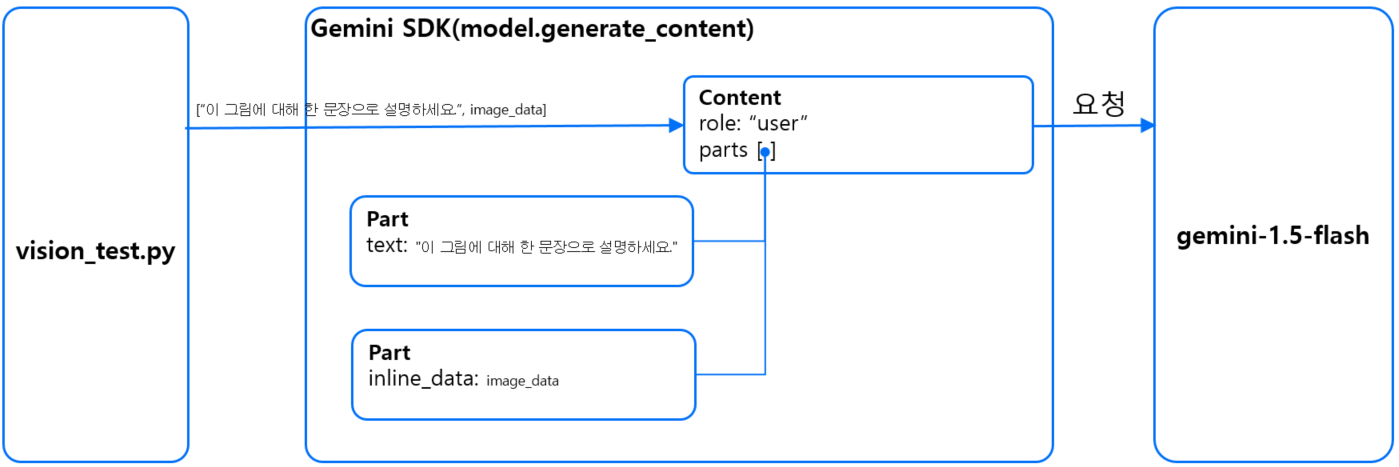

# 출력 구조 살펴보기

크게 응답을 담은 candidates 필드와  입출력에 사용된 토큰 수가 들어 있는 usage_metadata 필드로 나누어짐.

In [54]:
print(response._result) #response: GenerateContentResponse

candidates {
  content {
    parts {
      text: "이것은 마르셀 뒤샹이 만든 유명한 다다 작품 \"L.H.O.O.Q.\"의 복제본이다."
    }
    role: "model"
  }
  finish_reason: STOP
  index: 0
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EXPLICIT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
  }
}
usage_metadata {
  prompt_token_count: 270
  candidates_token_count: 34
  total_token_count: 304
}



## 출력구조 - Candidate 객체

In [56]:
# 제미나이의 웹 버전에서는 한 번의 요청에 대해 세 가지의 답변을 제공하나, API 버전에서는 아직은 1개의 Candidate만 제공.

print(f"건수: {len(response.candidates)}")
print("="*50)
for candidate in response.candidates:
    print(candidate)

건수: 1
content {
  parts {
    text: "이것은 마르셀 뒤샹이 만든 유명한 다다 작품 \"L.H.O.O.Q.\"의 복제본이다."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}



Candidate 객체에는 content 외에도 finish_reason과 safety_ratings 필드가 존재합니다. 

finish_reason 필드에 담겨 있는 FinishReason 객체(Enum)는 모델이 응답을 종료한 이유를 다음의 형태로 가지고 있습니다.

STOP 1 - 정상 종료. 모델의 메시지 생성 완료 또는 사용자가 설정한 종료 문자열 발견.
MAX_TOKENS 2 - 최대 토큰 도달. 사용자가 설정한 최대 토큰 수에 도달.
SAFETY 3 - 안전성 문제. 안전성 문제 발견.
RECITATION 4 - 텍스트 반복. 이미 생성한 텍스트를 반복하여 생성.
OTHER 5 - 기타. 이 밖의 다른 이유.

In [59]:
response.candidates[0].finish_reason

<FinishReason.STOP: 1>

safety_ratings 필드에 담겨 있는 SafetyRating 객체는 “HARASSMENT”, ”HATE SPEECH”, ”SEXUAL EXPLICIT”, ”DANGEROUS” 등 4가지의 안전성 점검 결과를 담고 있습니다.

In [60]:
response.candidates[0].safety_ratings

[category: HARM_CATEGORY_SEXUALLY_EXPLICIT
probability: NEGLIGIBLE
, category: HARM_CATEGORY_HATE_SPEECH
probability: NEGLIGIBLE
, category: HARM_CATEGORY_HARASSMENT
probability: NEGLIGIBLE
, category: HARM_CATEGORY_DANGEROUS_CONTENT
probability: NEGLIGIBLE
]

출력구조 개요도

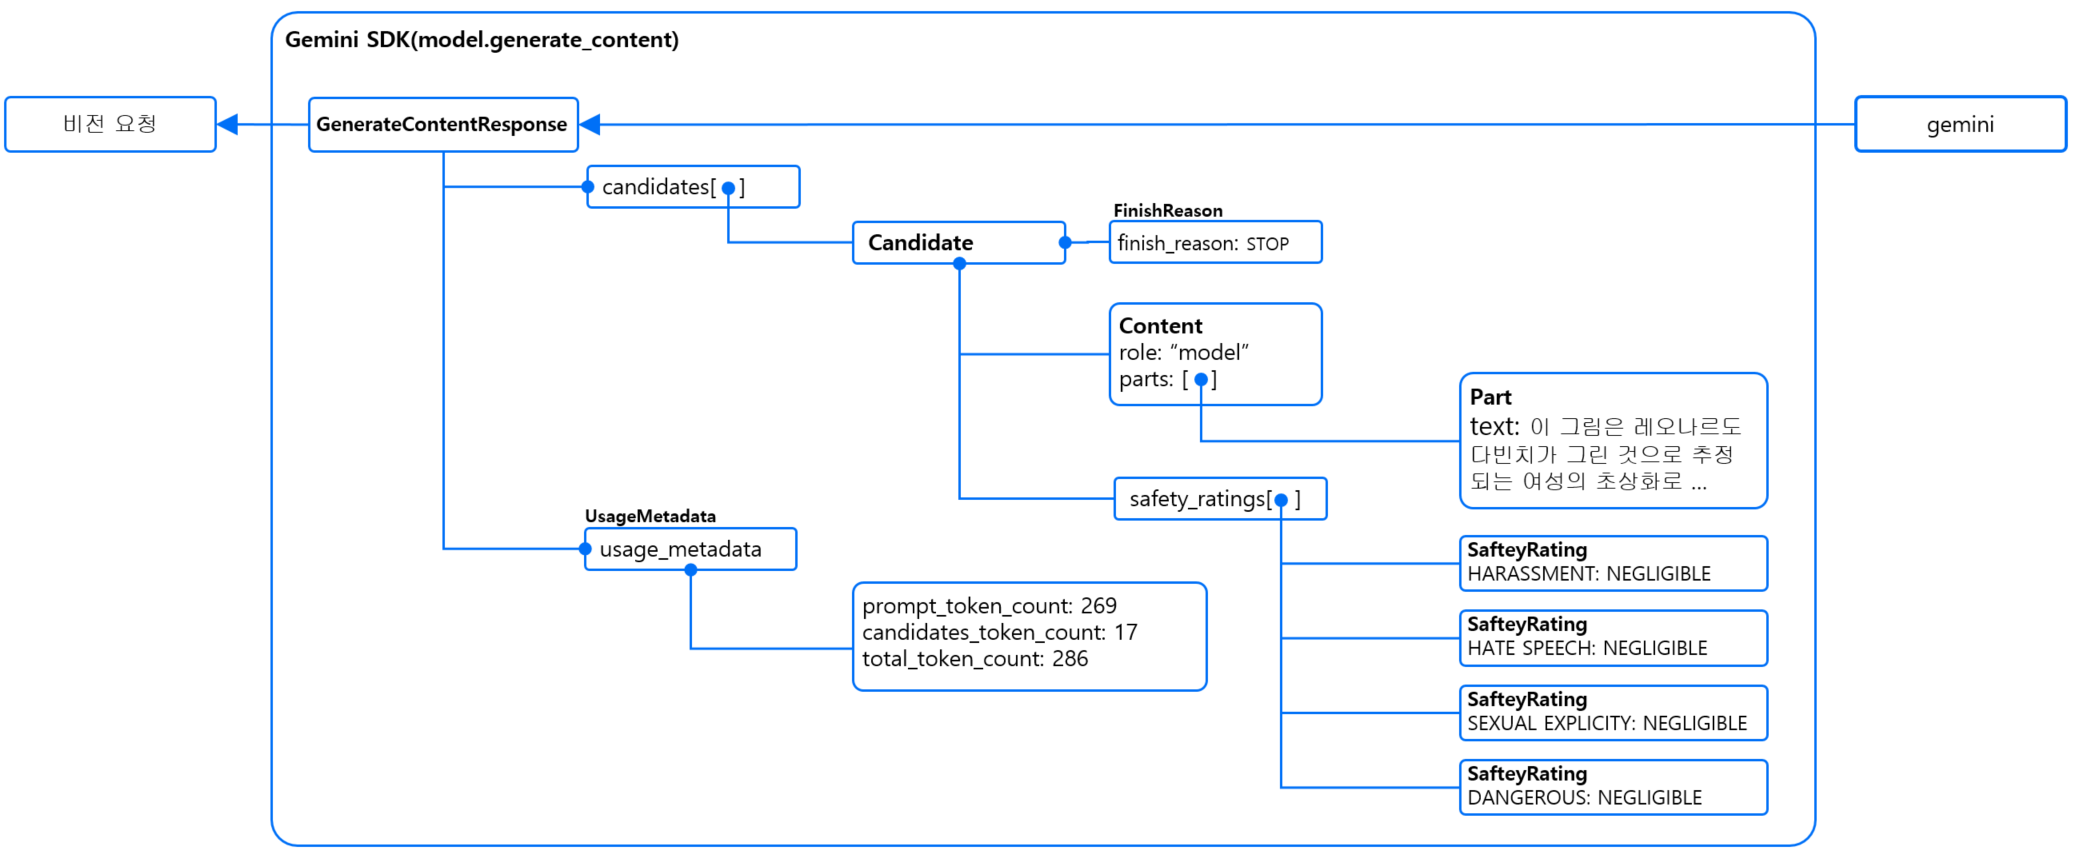